# **SCENARIO 1 – MULTILINEAR REGRESSION**

## Vettri Selvan- 24BAD127

##Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("spscientist/students-performance-in-exams")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'students-performance-in-exams' dataset.
Path to dataset files: /kaggle/input/students-performance-in-exams


In [ ]:
df = pd.read_csv("/kaggle/input/students-performance-in-exams/StudentsPerformance.csv")
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


##Create Target Variable

In [ ]:
df["Final Score"] = (
    df["math score"] +
    df["reading score"] +
    df["writing score"]
) / 3


##Encode Categorical Features

In [ ]:
df_encoded = pd.get_dummies(
    df,
    columns=[
        "gender",
        "race/ethnicity",
        "parental level of education",
        "lunch",
        "test preparation course"
    ],
    drop_first=True
)


##Select Features and Target

In [ ]:
X = df_encoded.drop([
    "math score",
    "reading score",
    "writing score",
    "Final Score"
], axis=1)

y = df_encoded["Final Score"]


##Missing Values

In [ ]:
print(df.isnull().sum())

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
Final Score                    0
dtype: int64


##Feature Scaling

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

##Train-Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)

##Train Multilinear Regression Model

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

##Predict Test Data

In [ ]:
y_pred = model.predict(X_test)

##Evaluate Model Performance

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)

MSE: 179.6023423362354
RMSE: 13.401579844788278
R2 Score: 0.16217185763155206


##Analyze Feature Influence

In [ ]:
coefficients = pd.Series(model.coef_, index=X.columns)
print(coefficients.sort_values(ascending=False))

lunch_standard                                   4.405985
race/ethnicity_group E                           2.068116
race/ethnicity_group D                           1.662529
parental level of education_bachelor's degree    1.129806
parental level of education_master's degree      0.454377
race/ethnicity_group C                           0.427839
race/ethnicity_group B                          -0.054856
parental level of education_some college        -0.357219
parental level of education_some high school    -1.254711
parental level of education_high school         -1.848668
gender_male                                     -2.044602
test preparation course_none                    -3.776664
dtype: float64


##Ridge Regularization

In [ ]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)

print("Ridge R2:", r2_score(y_test, ridge_pred))

Ridge R2: 0.16211577444109382


##Lasso Regularization

In [ ]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)

print("Lasso R2:", r2_score(y_test, lasso_pred))

Lasso R2: 0.15565398919126605


##Predicted vs Actual Plot

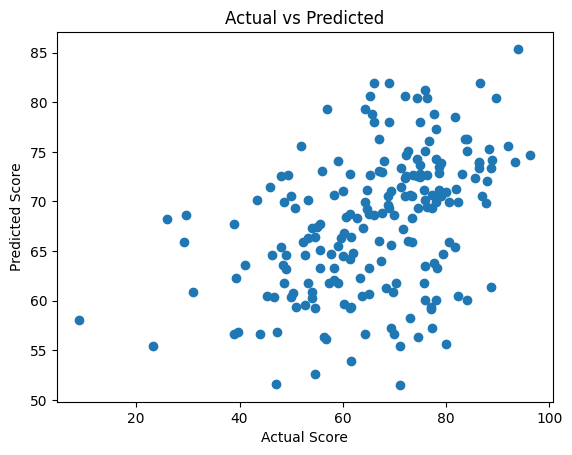

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Score")
plt.ylabel("Predicted Score")
plt.title("Actual vs Predicted")
plt.show()

##Coefficient Comparison Plot

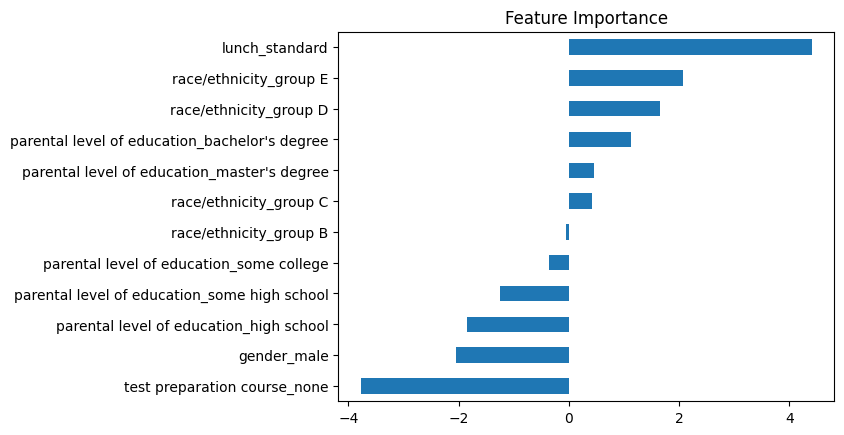

In [ ]:
coefficients.sort_values().plot(kind="barh")
plt.title("Feature Importance")
plt.show()

##Residual Distribution

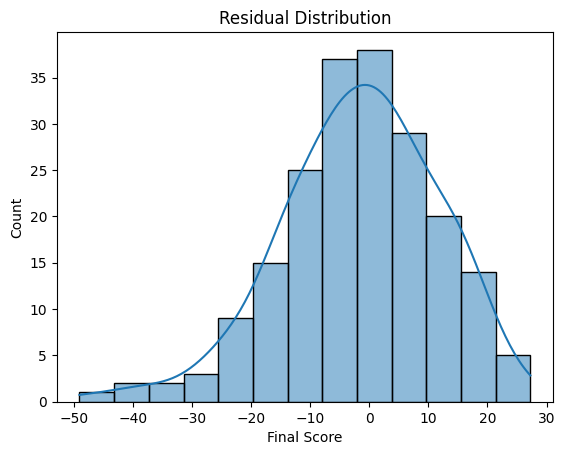

In [ ]:
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.title("Residual Distribution")
plt.show()